In [4]:
import force_internal_all2all as lib
from force_internal_all2all import HP
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# simulation time array
simtime = np.arange(0, HP.nsecs - HP.dt, HP.dt)
simtime_test = np.arange(1 * HP.nsecs, 2 * HP.nsecs - HP.dt, HP.dt)

# target function ft
ft = lib.get_ft(simtime, HP.amp, HP.freq)
ft_test = lib.get_ft(simtime_test, HP.amp, HP.freq)

network = lib.all2all(HP.N, HP.p, HP.g, HP.alpha, HP.learn_every, HP.nRec2Out,
                      simtime.shape[0])

time:  0.0
time:  72.0
time:  144.0
time:  216.0
time:  288.0
time:  360.0
time:  432.0
time:  504.0
time:  576.0
time:  648.0
time:  720.0
time:  792.0
time:  864.0
time:  936.0
time:  1008.0
time:  1080.0
time:  1152.0
time:  1224.0
time:  1296.0
time:  1368.0
Training MAE:  0.002


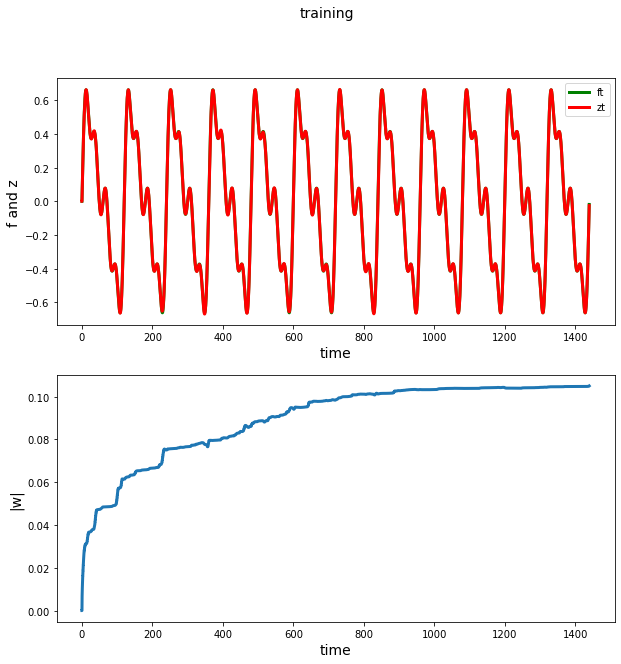

In [6]:
# train
x, rate, zt = network.train(simtime, ft, HP.nsecs, HP.dt)

In [7]:
# simulate
zt_predict = network.test(simtime_test, ft_test, x, rate, HP.dt)

Now testing... please wait.
Testing MAE:  0.005


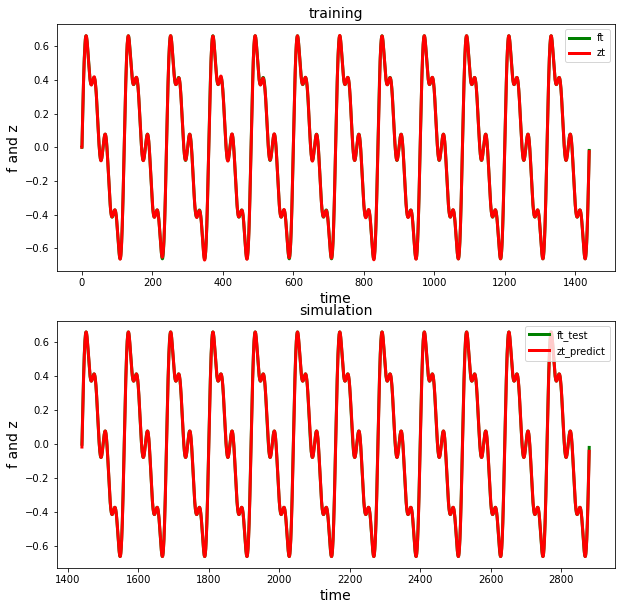

In [8]:
# plot
fig, axs = plt.subplots(2, figsize=(10, 10))
fig
line1, = axs[0].plot(simtime, ft, linewidth=HP.linewidth, color='green')
axs[0].set_title('training', fontsize=HP.fontsize)
axs[0].set_xlabel('time', fontsize=HP.fontsize)
axs[0].set_ylabel('f and z', fontsize=HP.fontsize)
line2, = axs[0].plot(simtime, zt, linewidth=HP.linewidth, color='red')
axs[0].legend((line1, line2), ('ft', 'zt'), loc='upper right')

axs[1].set_title('simulation', fontsize=HP.fontsize)
axs[1].set_xlabel('time', fontsize=HP.fontsize)
axs[1].set_ylabel('f and z', fontsize=HP.fontsize)
line3, = axs[1].plot(
    simtime_test, ft_test, linewidth=HP.linewidth, color='green')
line4, = axs[1].plot(
    simtime_test, zt_predict, linewidth=HP.linewidth, color='red')
axs[1].legend((line3, line4), ('ft_test', 'zt_predict'),
              loc='upper right')
plt.show()